In [24]:
import pandas as pd
TheftData=pd.read_csv("D:\ElectricityTheft\dataset\TunedElectricityDataset.csv")

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = TheftData.iloc[:, 3:1036].astype('float32' )
y = TheftData.iloc[:, 1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
pca = PCA(n_components=1033)  # Specify the number of components to keep
X_pca = pca.fit_transform(X_scaled)

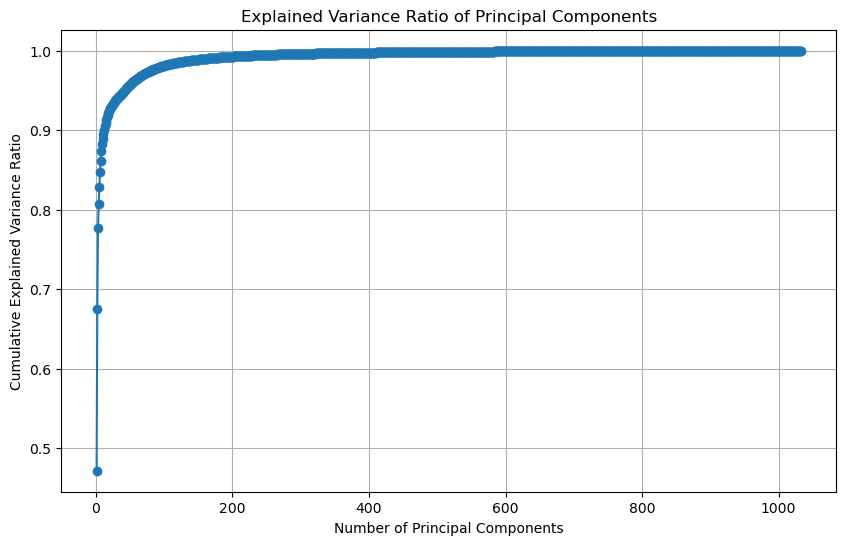

In [27]:
import matplotlib.pyplot as plt
import numpy as np
# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1034), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.title('Explained Variance Ratio of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [28]:
pca = PCA(n_components=300)  # Keep the first 300 principal components
X_pca = pca.fit_transform(X_scaled)

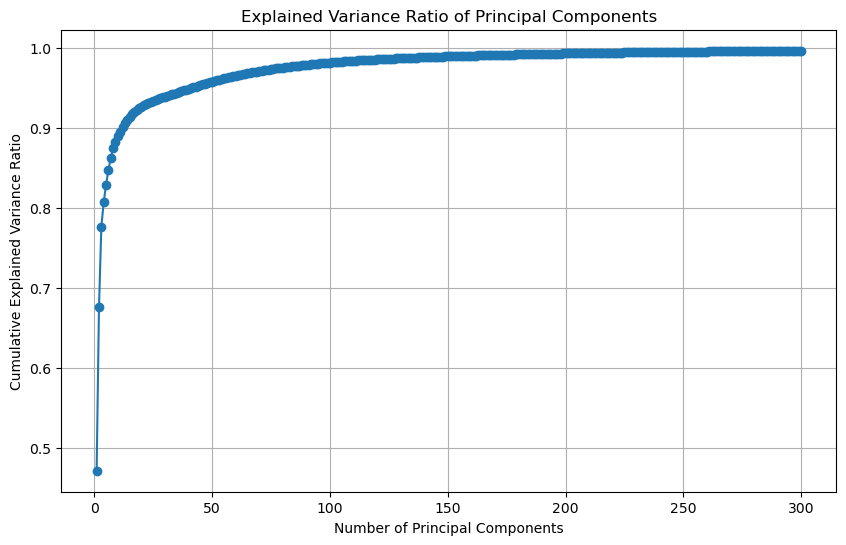

In [29]:
# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, 301), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.title('Explained Variance Ratio of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [31]:

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Reduced dataset
print("Original shape:", X_scaled.shape)
print("Reduced shape:", X_pca.shape)

Explained variance ratio: [4.71429974e-01 2.04154432e-01 1.00768261e-01 3.02516222e-02
 2.21830551e-02 1.85233559e-02 1.41800288e-02 1.28076728e-02
 7.80660380e-03 7.09182303e-03 5.80076361e-03 5.56496764e-03
 4.58344119e-03 3.99985490e-03 3.78728006e-03 3.55868018e-03
 3.09634395e-03 2.58218171e-03 2.07825098e-03 2.03020195e-03
 1.63497229e-03 1.42738502e-03 1.31245877e-03 1.29030563e-03
 1.25783635e-03 1.20380009e-03 1.14012964e-03 1.10739004e-03
 1.06014533e-03 1.00967742e-03 9.76777868e-04 9.73167480e-04
 9.68170993e-04 9.68069769e-04 9.67961794e-04 9.67839558e-04
 9.61831305e-04 9.60215577e-04 9.53326467e-04 9.51945141e-04
 9.43983730e-04 9.43480700e-04 9.35940188e-04 9.03203443e-04
 8.93112214e-04 8.87624046e-04 8.76075472e-04 8.61711858e-04
 8.54447717e-04 8.52599507e-04 8.48939759e-04 8.43069516e-04
 8.24705872e-04 8.01833987e-04 7.76006025e-04 7.35459791e-04
 6.91945024e-04 6.91061257e-04 6.61507947e-04 6.48541609e-04
 6.16614474e-04 6.10261224e-04 6.03216002e-04 5.92569064e-0

In [32]:
pcaVariance = pd.DataFrame (pca.explained_variance_ratio_)
pcaVariance.to_csv('D:\ElectricityTheft\PCA\PCAvariance.csv', index=False)



In [33]:
pcaVector = pd.DataFrame (X_pca)
pcaVector.to_csv('D:\ElectricityTheft\PCA\PCAvector.csv', index=False)


In [34]:
y_selected = y[:X_pca.shape[0]]

In [35]:
y_selected.shape

(42372,)

In [36]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_selected)
y = encoder.transform(y_selected)


from sklearn.preprocessing import OneHotEncoder
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = y.reshape(len(y), 1)
y = onehot_encoder.fit_transform(integer_encoded)
print(y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [37]:
y.shape

(42372, 2)

In [38]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_trainNormal, X_testNormal, y_trainNormal, y_testNormal = train_test_split(X_pca, y, test_size = 0.25, random_state = 20)



In [39]:
X_trainNormal.shape

(31779, 300)

In [40]:
y_trainNormal.shape

(31779, 2)

In [41]:
X_testNormal.shape

(10593, 300)

In [71]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Add input layer
model.add(layers.Input(shape=(300,)))

# Add hidden layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))  # Adding dropout for regularization
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))

# Add output layer
model.add(layers.Dense(2, activation='softmax'))  # Adjust activation based on your task (e.g., 'softmax' for multi-class classification)

# Compile the model


# Print model summary


In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               154112    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 2)                 258       
                                                                 
Total params: 318,594
Trainable params: 318,594
Non-tr

In [73]:
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_trainNormal, y_trainNormal,validation_split=0.25, batch_size = 256, epochs = 5)

Epoch 1/5


C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


94/94 [==============================] - 1s 10ms/step - loss: 0.5844 - accuracy: 0.8414 - val_loss: 0.4576 - val_accuracy: 0.9166
Epoch 2/5
94/94 [==============================] - 1s 8ms/step - loss: 0.4235 - accuracy: 0.9151 - val_loss: 0.3712 - val_accuracy: 0.9164
Epoch 3/5
94/94 [==============================] - 1s 8ms/step - loss: 0.3717 - accuracy: 0.9142 - val_loss: 0.3409 - val_accuracy: 0.9164
Epoch 4/5
94/94 [==============================] - 1s 7ms/step - loss: 0.3432 - accuracy: 0.9150 - val_loss: 0.3228 - val_accuracy: 0.9177
Epoch 5/5
94/94 [==============================] - 1s 8ms/step - loss: 0.3330 - accuracy: 0.9150 - val_loss: 0.3125 - val_accuracy: 0.9176


In [74]:
history.history['accuracy']

[0.8414449691772461,
 0.9150792956352234,
 0.9141562581062317,
 0.9149534106254578,
 0.9149534106254578]

In [75]:
history.history['val_accuracy']

[0.9165512919425964,
 0.9164254069328308,
 0.9164254069328308,
 0.9176840782165527,
 0.9175581932067871]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


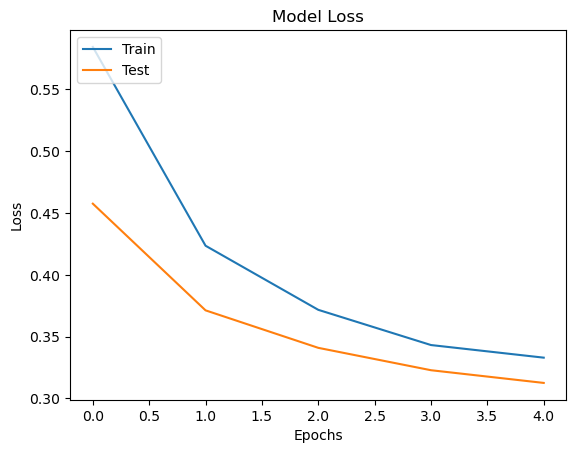

In [76]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend([ 'Train' , 'Test' ], loc= 'upper left' )
plt.show()

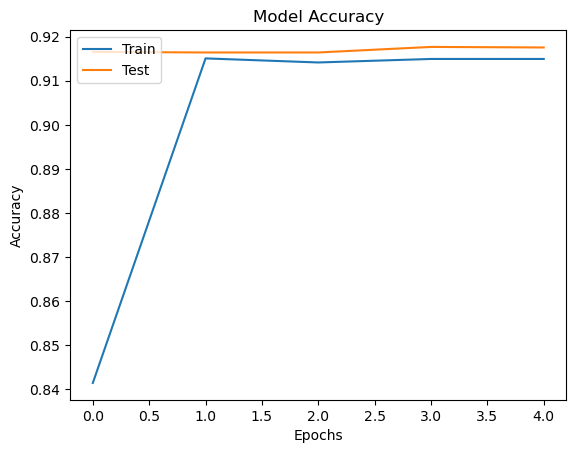

In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend([ 'Train' , 'Test' ], loc= 'upper left' )
plt.show()

In [78]:
y_pred = model.predict(X_testNormal)

332/332 [==============================] - 1s 2ms/step


In [79]:
for y in y_pred:
    print(y)
    print("==============")

[0.951588 0.048412]
[0.94984424 0.05015577]
[0.7851165  0.21488358]
[0.9000091  0.09999095]
[0.88313717 0.11686279]
[9.999253e-01 7.460046e-05]
[0.9740831  0.02591688]
[0.9689558 0.0310442]
[0.99754864 0.00245137]
[0.9724338  0.02756601]
[0.9190438  0.08095626]
[9.9960750e-01 3.9248492e-04]
[0.97969013 0.02030982]
[0.9283716  0.07162844]
[0.95699495 0.04300506]
[0.9834294  0.01657064]
[0.7954225  0.20457745]
[0.9628427  0.03715735]
[0.9903297 0.0096702]
[0.93938833 0.06061162]
[0.96572995 0.03427014]
[0.9972442  0.00275577]
[0.97576696 0.02423305]
[9.990042e-01 9.957682e-04]
[9.9983501e-01 1.6492321e-04]
[0.95060223 0.04939784]
[0.9844707  0.01552919]
[0.9961675  0.00383244]
[0.888562   0.11143805]
[0.8229476  0.17705232]
[0.85353386 0.14646623]
[0.9967818 0.0032181]
[0.9681987  0.03180116]
[9.9987507e-01 1.2505006e-04]
[0.87763655 0.12236337]
[0.99696875 0.00303125]
[9.9986458e-01 1.3546343e-04]
[0.92269176 0.07730825]
[0.94234926 0.05765062]
[0.99678314 0.0032169 ]
[0.99090844 0.0090

[0.96646523 0.03353472]
[0.99696654 0.00303347]
[0.9970218  0.00297813]
[0.95156837 0.04843164]
[9.9994105e-01 5.8885504e-05]
[0.84158605 0.15841393]
[0.8612361  0.13876382]
[0.99704057 0.00295943]
[9.9954146e-01 4.5845204e-04]
[0.98203236 0.01796761]
[0.94330716 0.05669286]
[0.8068064  0.19319372]
[9.9995857e-01 4.1348485e-05]
[0.9949478  0.00505233]
[0.90370554 0.09629446]
[0.97072    0.02928001]
[0.89627016 0.10372972]
[0.9371396 0.0628605]
[9.9992985e-01 7.0112583e-05]
[0.9751333 0.0248666]
[0.9683746  0.03162544]
[0.9922239  0.00777594]
[0.9957367  0.00426332]
[0.89444923 0.10555075]
[0.97989255 0.02010737]
[0.9603615  0.03963847]
[0.9029588  0.09704109]
[0.96874464 0.03125533]
[0.94299597 0.05700407]
[9.9987030e-01 1.2977171e-04]
[9.9988443e-01 1.1545491e-04]
[0.9792603  0.02073972]
[9.9925506e-01 7.4499496e-04]
[0.9934189  0.00658114]
[0.9913411  0.00865889]
[0.9684122  0.03158768]
[0.99263716 0.00736283]
[0.84943   0.1505699]
[0.9399779  0.06002213]
[0.99878216 0.00121786]
[0.9

[9.9965024e-01 3.4980077e-04]
[9.9963111e-01 3.6895936e-04]
[0.9554687  0.04453133]
[0.8769612  0.12303886]
[0.9785586  0.02144138]
[0.93056554 0.06943452]
[0.99436045 0.00563951]
[0.98085445 0.01914548]
[0.98131347 0.01868641]
[0.98553807 0.01446189]
[0.9184282  0.08157168]
[0.8949962 0.1050037]
[9.9991995e-01 7.9969555e-05]
[9.9995273e-01 4.7200465e-05]
[0.9733632 0.0266367]
[0.95008093 0.04991897]
[0.9548142  0.04518586]
[0.9981561  0.00184388]
[0.8950882  0.10491179]
[0.82449573 0.17550428]
[0.98509467 0.01490517]
[0.89120096 0.10879897]
[0.96063215 0.03936787]
[9.997251e-01 2.749219e-04]
[9.9962586e-01 3.7419231e-04]
[0.9824163  0.01758372]
[0.92633295 0.07366699]
[0.8132001  0.18679991]
[9.9968970e-01 3.1028257e-04]
[9.9995619e-01 4.3752058e-05]
[0.9694185  0.03058149]
[0.98719674 0.01280318]
[0.96283746 0.03716246]
[0.9778352  0.02216476]
[9.9995416e-01 4.5719451e-05]
[0.75982785 0.24017219]
[0.7439966  0.25600335]
[0.9767936  0.02320631]
[0.9356568  0.06434312]
[9.9993509e-01 6

[0.93765444 0.06234551]
[0.9421877 0.0578123]
[0.93164706 0.0683529 ]
[9.9919873e-01 8.0123992e-04]
[0.9787102  0.02128981]
[0.88408357 0.11591639]
[0.87763584 0.12236419]
[9.9971604e-01 2.8397949e-04]
[9.9995691e-01 4.2979478e-05]
[0.9458741  0.05412593]
[0.8652504 0.1347496]
[0.8901979  0.10980212]
[0.9338363  0.06616366]
[0.9261548  0.07384522]
[9.9960786e-01 3.9218180e-04]
[0.9987781  0.00122201]
[9.9983597e-01 1.6413759e-04]
[0.8848533  0.11514673]
[0.99164605 0.00835396]
[0.93187654 0.0681235 ]
[0.9716084 0.0283915]
[9.9950379e-01 4.9613236e-04]
[0.9892588  0.01074115]
[0.99802876 0.00197117]
[0.98314756 0.01685248]
[0.98314166 0.01685822]
[0.9364292  0.06357075]
[0.9759777  0.02402235]
[0.98250306 0.01749695]
[0.9126876  0.08731238]
[0.99757046 0.00242947]
[9.9993342e-01 6.6566485e-05]
[0.9861695  0.01383039]
[0.99004364 0.00995634]
[0.9005237  0.09947626]
[0.9127365  0.08726352]
[0.97735935 0.02264061]
[0.9715814 0.0284185]
[0.8059218  0.19407819]
[0.94412637 0.05587367]
[0.932

[0.95965475 0.04034524]
[0.9978842  0.00211574]
[0.85142297 0.14857708]
[0.9645801  0.03541987]
[0.9346048  0.06539519]
[0.99688894 0.00311112]
[0.98314756 0.01685247]
[9.9920434e-01 7.9568295e-04]
[9.9967432e-01 3.2568444e-04]
[0.9933754  0.00662464]
[0.9988693  0.00113069]
[9.9954277e-01 4.5715575e-04]
[0.93693984 0.06306017]
[9.9989218e-01 1.0777512e-04]
[0.5030409 0.4969591]
[0.7382968 0.2617032]
[9.9992484e-01 7.5098309e-05]
[0.99754983 0.00245011]
[0.9985406  0.00145941]
[9.9947745e-01 5.2249240e-04]
[9.9984360e-01 1.5635493e-04]
[9.999543e-01 4.567222e-05]
[9.9966550e-01 3.3448386e-04]
[0.9194003  0.08059976]
[0.9989705 0.0010294]
[0.87740695 0.12259308]
[9.991033e-01 8.967035e-04]
[0.90347147 0.09652846]
[0.98111814 0.01888193]
[0.9817967 0.0182032]
[0.8786415 0.1213584]
[0.99747306 0.00252694]
[0.853859   0.14614104]
[9.9981523e-01 1.8473929e-04]
[0.8412738  0.15872613]
[9.9976802e-01 2.3187514e-04]
[0.97854406 0.02145592]
[0.99773127 0.00226871]
[0.9457372 0.0542627]
[0.99713

[0.9626777  0.03732233]
[0.9892324  0.01076755]
[9.999097e-01 9.028840e-05]
[0.8486894  0.15131064]
[9.999594e-01 4.051985e-05]
[0.9420027 0.0579972]
[0.8789344  0.12106564]
[9.9992281e-01 7.7143166e-05]
[0.9721838  0.02781611]
[0.91975856 0.08024152]
[0.9939868  0.00601329]
[9.995597e-01 4.402494e-04]
[0.9788447  0.02115533]
[0.9978767  0.00212327]
[0.99886215 0.00113786]
[9.999171e-01 8.288480e-05]
[0.9891725  0.01082746]
[9.9982476e-01 1.7532380e-04]
[9.9980021e-01 1.9973522e-04]
[0.9890691  0.01093089]
[9.997828e-01 2.173307e-04]
[0.8693743  0.13062568]
[9.991336e-01 8.664358e-04]
[0.8962669  0.10373301]
[0.997754   0.00224596]
[0.9733424  0.02665757]
[0.95625675 0.04374313]
[0.9829706  0.01702943]
[0.9338372  0.06616279]
[0.9109134  0.08908654]
[0.9592862  0.04071373]
[0.72589636 0.27410364]
[9.990197e-01 9.802505e-04]
[0.99793094 0.00206902]
[0.9863694  0.01363066]
[0.996894   0.00310596]
[0.983531   0.01646897]
[9.9986315e-01 1.3689046e-04]
[0.9529237  0.04707627]
[0.9975217  0.

[0.9962941  0.00370595]
[0.97575414 0.02424593]
[9.997952e-01 2.049143e-04]
[0.8703151  0.12968491]
[9.9995285e-01 4.7102985e-05]
[0.95359474 0.04640521]
[9.9994391e-01 5.5969824e-05]
[0.9988367  0.00116327]
[0.8559179  0.14408213]
[0.9077178  0.09228205]
[0.9984552  0.00154474]
[0.99795246 0.00204752]
[0.9676721  0.03232782]
[0.89976954 0.10023052]
[0.9273929  0.07260711]
[0.91461205 0.08538799]
[0.9728253  0.02717457]
[0.9561613  0.04383865]
[0.9776128  0.02238719]
[0.9735807  0.02641924]
[0.18923438 0.8107656 ]
[0.6969428  0.30305716]
[0.9283782  0.07162175]
[0.98865205 0.01134793]
[9.9972105e-01 2.7893262e-04]
[0.9919188  0.00808112]
[0.9209669  0.07903306]
[0.90218335 0.09781659]
[0.9983402  0.00165985]
[0.9278816  0.07211846]
[0.9743742  0.02562586]
[0.98028374 0.0197162 ]
[0.9543113  0.04568863]
[0.96142507 0.03857489]
[0.94152856 0.05847142]
[9.9995834e-01 4.1602176e-05]
[0.9774197  0.02258023]
[9.9994320e-01 5.6707795e-05]
[0.9459989  0.05400101]
[0.9103479  0.08965211]
[0.972

[0.9636611  0.03633894]
[0.94905794 0.05094203]
[0.98314756 0.01685247]
[0.8215158  0.17848422]
[0.98314756 0.01685247]
[0.8477605  0.15223949]
[0.8477132 0.1522868]
[9.994620e-01 5.380443e-04]
[0.84104246 0.15895763]
[0.9475238  0.05247628]
[9.9981236e-01 1.8762398e-04]
[0.94323844 0.05676154]
[9.999576e-01 4.236429e-05]
[9.999098e-01 9.014499e-05]
[9.9933916e-01 6.6086842e-04]
[0.9889519  0.01104805]
[0.99722564 0.0027744 ]
[0.99619883 0.00380118]
[0.9908205  0.00917947]
[0.96063584 0.03936408]
[0.9564471  0.04355282]
[0.971636   0.02836393]
[9.9994534e-01 5.4631459e-05]
[0.88238233 0.11761763]
[0.991856   0.00814407]
[0.96860147 0.03139856]
[9.999228e-01 7.712772e-05]
[0.6943638 0.3056362]
[0.9500837  0.04991638]
[0.94784933 0.05215064]
[0.9838771  0.01612293]
[0.99767774 0.00232228]
[0.8606114 0.1393886]
[0.8847855  0.11521447]
[0.9522075  0.04779245]
[9.99957e-01 4.28652e-05]
[9.9986386e-01 1.3620354e-04]
[9.998367e-01 1.633354e-04]
[0.92417645 0.07582352]
[0.9964094  0.00359053]


[0.9847352  0.01526481]
[0.8743159  0.12568404]
[0.942103   0.05789699]
[9.999904e-01 9.512931e-06]
[0.97226346 0.02773654]
[9.9999994e-01 1.6837548e-08]
[0.9161625 0.0838375]
[0.8942321  0.10576789]
[9.9940908e-01 5.9094495e-04]
[0.90611905 0.09388088]
[9.998710e-01 1.291126e-04]
[9.9980330e-01 1.9662216e-04]
[0.97646093 0.02353903]
[0.9908195  0.00918045]
[0.95758545 0.0424146 ]
[0.96277636 0.03722356]
[9.999384e-01 6.145935e-05]
[0.987422   0.01257795]
[0.83575106 0.16424897]
[9.9947268e-01 5.2721496e-04]
[0.9643237  0.03567629]
[0.9737503  0.02624981]
[9.9995774e-01 4.2180305e-05]
[9.9968719e-01 3.1278096e-04]
[0.9393367  0.06066318]
[0.996176   0.00382393]
[0.9779922 0.0220078]
[0.980769   0.01923104]
[0.9114341  0.08856592]
[9.9989134e-01 1.0857050e-04]
[0.83102053 0.16897945]
[0.898937   0.10106297]
[0.84889984 0.15110014]
[0.84414685 0.15585311]
[9.9971759e-01 2.8250398e-04]
[0.99435216 0.00564785]
[9.991261e-01 8.738271e-04]
[0.8974917  0.10250825]
[0.94361454 0.05638549]
[0.8

In [80]:
predicted = []
for y in y_pred:
    max_index = y.tolist().index(max(y))
    predicted.append(max_index)

# Find the index of the maximum number




In [81]:
actual = []
for y in y_testNormal:
    max_index = y.tolist().index(max(y))
    actual.append(max_index)

In [82]:
predicted

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [83]:
actual

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,predicted)

array([[9615,   46],
       [ 903,   29]], dtype=int64)

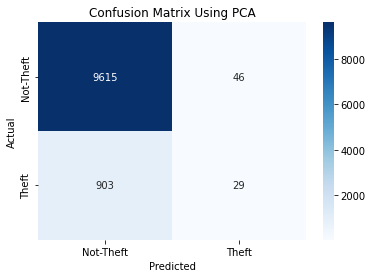

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
TP = 9615
FP = 46
TN = 29
FN = 903

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap([[TP, FP], [FN, TN]], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not-Theft', 'Theft'], yticklabels=['Not-Theft', 'Theft'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Using PCA')
plt.show()

In [85]:
from sklearn.metrics import classification_report
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      9661
           1       0.39      0.03      0.06       932

    accuracy                           0.91     10593
   macro avg       0.65      0.51      0.51     10593
weighted avg       0.87      0.91      0.87     10593



In [86]:
cm=classification_report(actual,predicted)

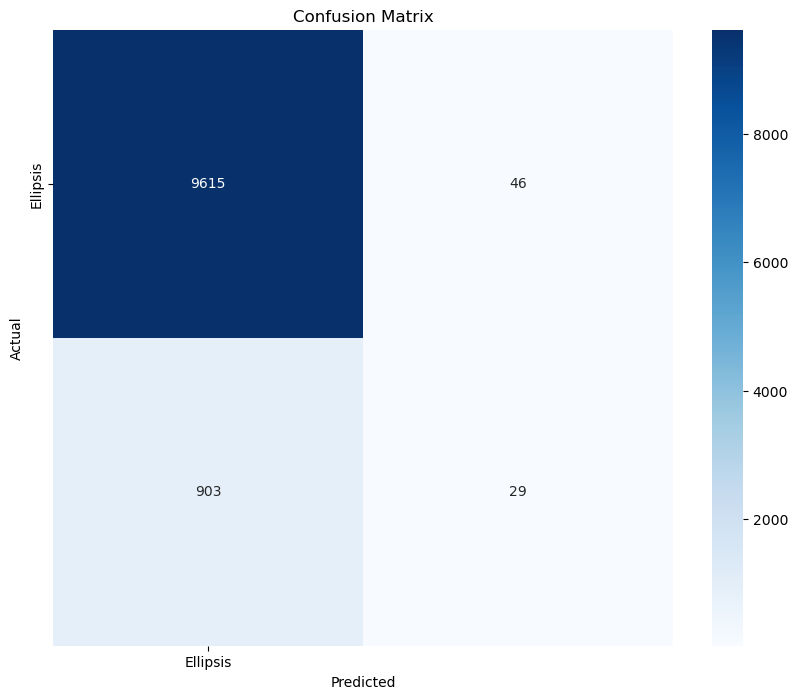

In [87]:
import seaborn as sns
cm = confusion_matrix(actual, predicted)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[...], yticklabels=[...])  # Replace [...] with your class labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

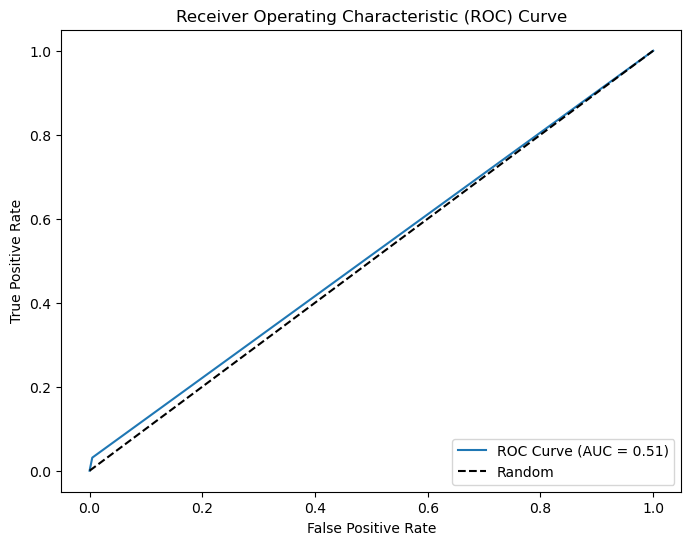

In [88]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(actual, predicted)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [89]:
df = pd.DataFrame(X_testNormal).head(10)
#df = pd.DataFrame(X_testNormal)
df.to_csv("D:\ElectricityTheft\PCA\pcaXtest.csv")

In [90]:
df = pd.DataFrame(X_trainNormal).head(10)
df.to_csv("D:\ElectricityTheft\PCA\pcaXtrain.csv")

In [91]:
one_d_array = y_pred.flatten()

In [92]:
val1=[]
val2=[]
for y in y_pred:
    print(y[0])
    print(y[1])
    print("====")
    val1.append(y[0])
    val2.append(y[1])


0.951588
0.048411995
====
0.94984424
0.050155766
====
0.7851165
0.21488358
====
0.9000091
0.09999095
====
0.88313717
0.11686279
====
0.9999253
7.460046e-05
====
0.9740831
0.02591688
====
0.9689558
0.031044196
====
0.99754864
0.0024513681
====
0.9724338
0.027566008
====
0.9190438
0.08095626
====
0.9996075
0.00039248492
====
0.97969013
0.02030982
====
0.9283716
0.07162844
====
0.95699495
0.043005057
====
0.9834294
0.016570644
====
0.7954225
0.20457745
====
0.9628427
0.037157353
====
0.9903297
0.009670197
====
0.93938833
0.060611624
====
0.96572995
0.03427014
====
0.9972442
0.002755766
====
0.97576696
0.024233053
====
0.9990042
0.0009957682
====
0.999835
0.00016492321
====
0.95060223
0.049397837
====
0.9844707
0.015529192
====
0.9961675
0.0038324397
====
0.888562
0.11143805
====
0.8229476
0.17705232
====
0.85353386
0.14646623
====
0.9967818
0.0032181004
====
0.9681987
0.03180116
====
0.99987507
0.00012505006
====
0.87763655
0.12236337
====
0.99696875
0.003031247
====
0.9998646
0.000135463

In [93]:
actual

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [94]:
df = pd.DataFrame({'Actual': actual, 'Softmax Predicted Value 1': val1, 'Softmax Predicted Value 2': val2, 'Predicted Result': predicted})
df.to_excel("D:\ElectricityTheft\PCA\pcaActualPredicted.xlsx")

In [95]:
df = pd.DataFrame({'Training Accuracy': history.history['accuracy'], 'Test Accuracy': history.history['val_accuracy']})
df.to_excel("D:\ElectricityTheft\PCA\pcaAccuracies.xlsx")